# Лабораторная 4 Югай Ильи AIN-1-21

In [19]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

wine = load_wine()

### Изучение данных

In [20]:
# Посмотрим на данные и их описание
print(wine.DESCR)

# Создадим DataFrame для анализа
data = pd.DataFrame(wine.data, columns=wine.feature_names)

# Посмотрим на первые несколько строк данных
data.head()


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


### Разделение данных на обучающий и тестовые наборы


In [21]:
from sklearn.model_selection import train_test_split

X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Исследование данных с помощью визуализации
Для визуализации данных в данном случае мы можем построить гистограммы признаков:

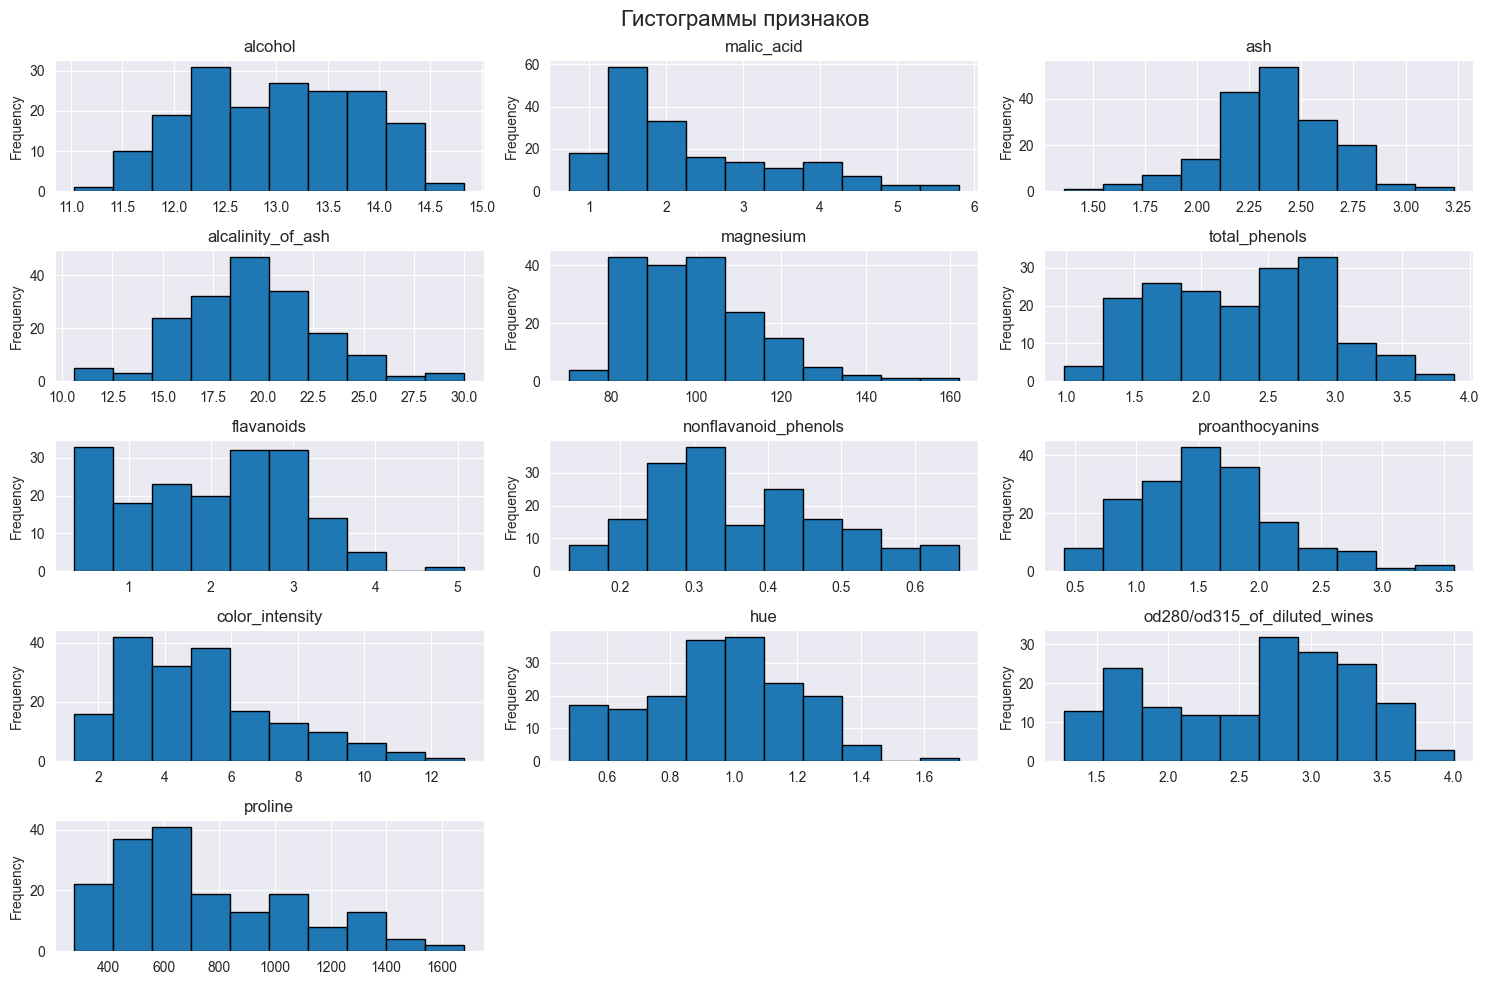

In [29]:
# Визуализация гистограмм признаков
num_features = len(wine.feature_names)
rows = num_features // 3 + 1

fig, axes = plt.subplots(rows, 3, figsize=(15, 10))
fig.suptitle("Гистограммы признаков", fontsize=16)

for i, feature in enumerate(wine.feature_names):
    ax = axes[i // 3, i % 3]
    data[feature].plot(kind='hist', title=feature, edgecolor='k', ax=ax)

# Удаление лишних пустых графиков, если их количество не делится на 3
for i in range(num_features, rows * 3):
    fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()


### Построение модели k-ближайших соседей
Для построения модели k-ближайших соседей используем библиотеку 'KNeighborsClassifier':

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Создание модели
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение модели на обучающих данных
knn.fit(X_train, y_train)


KNeighborsClassifier()

### Прогноз модели
Теперь мы можем сделать прогнозы на тестовых данных:

In [24]:
y_pred = knn.predict(X_test)
y_pred

array([2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0])

### Оценка качества модели
Давайте оценим качество модели, вычислив метрики классификации, такие как точность, полнота и F1-мера.

In [25]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(report)


Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



### График распределения классов
Давайте посмотрим на распределение классов в датасете "wine":

C:\Users\for_i\AppData\Local\Temp\ipykernel_10952\3077528740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y, palette="Set3")


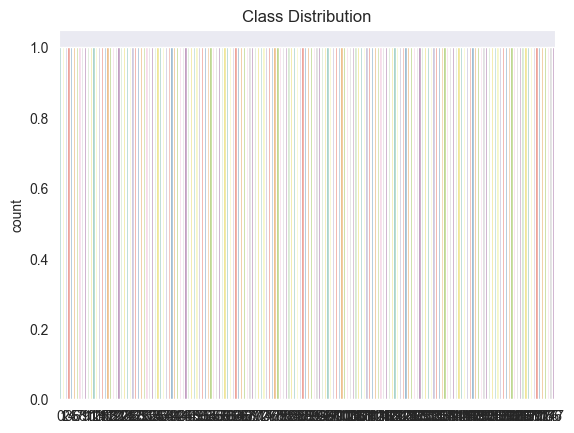

In [26]:
import seaborn as sns

sns.countplot(y, palette="Set3")
plt.title("Class Distribution")
plt.show()


### Матрица ошибок
После получения прогнозов модели, можно построить матрицу ошибок для оценки производительности модели:

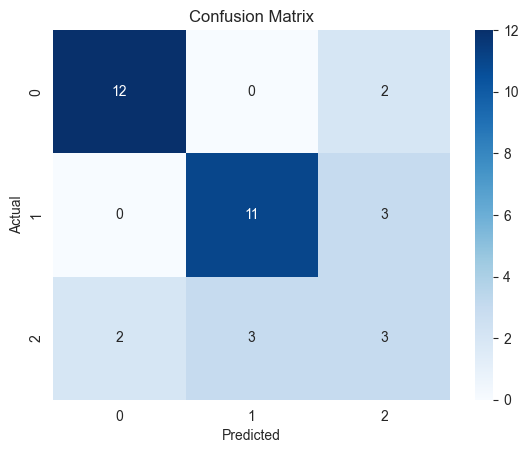

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Кривая обучения
Можно также построить кривую обучения, чтобы оценить, как изменение количества соседей влияет на качество модели:

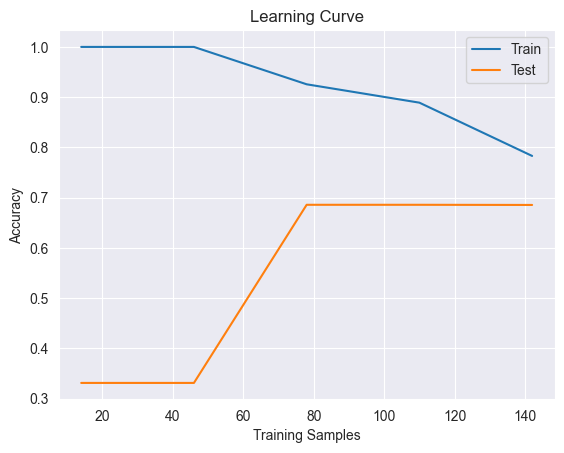

In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train")
plt.plot(train_sizes, test_mean, label="Test")
plt.title("Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Вывод
Модель k-ближайших соседей успешно классифицирует сорта вин, хотя точность не так высока, как в первом датасете. Дополнительная настройка параметров может улучшить результаты.